In [ ]:
rutas = './rutas.txt'

In [ ]:
with open(rutas, 'r') as archivo:
    for linea in archivo.readlines():
        exec(linea.strip(), globals())

In [ ]:
# !pip install -r requirements

In [ ]:
import numpy as np
import pandas as pd
from random import randint
import time
import sys
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df_rf_1 = pd.read_excel(comparaciones + '/comparaciones_rf.xlsx')
df_rf_2 = pd.read_excel(comparaciones + '/comparaciones_rf_2.xlsx')
df_xgb = pd.read_excel(comparaciones + '/comparaciones_xgb.xlsx')
df_nn = pd.read_excel(comparaciones + '/comparaciones_nn.xlsx')

In [ ]:
df_rf = pd.concat([df_rf_1, df_rf_2])

In [ ]:
df_rf.shape

(456, 7)

In [ ]:
df_xgb.shape

(719, 7)

In [ ]:
df_nn.shape

(288, 7)

In [ ]:
df_rf['modelo'] = 'rf'
df_xgb['modelo'] = 'xgb'
df_nn['modelo'] = 'nn'

In [ ]:
df_rf_reset = df_rf.reset_index(drop=True)
df_xgb_reset = df_xgb.reset_index(drop=True)
df_nn_reset = df_nn.reset_index(drop=True)

In [ ]:
df = pd.concat([df_rf_reset, df_xgb_reset, df_nn_reset], ignore_index=True)

In [ ]:
df.columns

Index(['hiperparametros', 'usuario', 'y_test', 'productos_test',
       'y_pred_regressor', 'productos_regressor', 'coincidencias_regressor',
       'modelo'],
      dtype='object')

In [ ]:
df.shape

(1463, 8)

In [ ]:
df[(df['modelo']=='nn') & (df['productos_regressor']>30)]

,hiperparametros,usuario,y_test,productos_test,y_pred_regressor,productos_regressor,coincidencias_regressor,modelo
1195,"usuario=3133, modelo: 3, activation1=relu, ac...",3133,[ 2 5 18 149 150 199 208],7,[ 0 1 2 3 4 5 6 7 8 9 10 ...,525,4,nn
1249,"usuario=3133, modelo: 3, activation1=relu, ac...",3133,[ 2 5 18 149 150 199 208],7,[ 0 1 2 3 4 5 6 7 8 9 10 ...,530,7,nn
1252,"usuario=3133, modelo: 3, activation1=relu, ac...",3133,[ 2 5 18 149 150 199 208],7,[ 0 1 2 3 4 5 6 8 9 11 12 ...,463,7,nn
1261,"usuario=3133, modelo: 3, activation1=relu, ac...",3133,[ 2 5 18 149 150 199 208],7,[ 0 1 2 3 4 5 7 9 10 11 12 ...,340,6,nn
1264,"usuario=3133, modelo: 3, activation1=relu, ac...",3133,[ 2 5 18 149 150 199 208],7,[ 4 5 7 9 10 16 18 22 27 32 35 ...,233,5,nn
1270,"usuario=3133, modelo: 3, activation1=relu, ac...",3133,[ 2 5 18 149 150 199 208],7,[ 0 1 2 3 4 5 6 7 8 9 10 ...,530,7,nn
1345,"usuario=1971, modelo: 3, activation1=relu, ac...",1971,[ 16 18 55 57 129 130 147 157 161],9,[ 0 1 2 3 4 5 6 7 8 9 10 ...,528,9,nn
1357,"usuario=1971, modelo: 3, activation1=relu, ac...",1971,[ 16 18 55 57 129 130 147 157 161],9,[ 0 1 2 3 4 5 6 7 8 9 10 ...,530,9,nn
1360,"usuario=1971, modelo: 3, activation1=relu, ac...",1971,[ 16 18 55 57 129 130 147 157 161],9,[ 0 2 3 5 8 9 10 13 15 16 17 ...,338,8,nn


In [ ]:
df = df.drop(df[(df['modelo']=='nn') & (df['productos_regressor']>30)].index)

In [ ]:
df = df.drop(df[df['productos_regressor']==0].index)

In [ ]:
(df['coincidencias_regressor']==0).sum()

153

In [ ]:
df = df.drop(df[df['coincidencias_regressor']==0].index)

##Datos para matriz de confusión:

TP = coincidencias_regressor

FP = productos_regressor - coincidencias_regressor

FN = productos_test - coincidencias_regressor

TN = 530 - productos_test - productos_regressor + coincidencias_regressor

In [ ]:
df['accuracy'] = (df['coincidencias_regressor'] + (530 - df['productos_test'] - df['productos_regressor'] + df['coincidencias_regressor'])) / (df['coincidencias_regressor'] + (530 - df['productos_test'] - df['productos_regressor'] + df['coincidencias_regressor']) + (df['productos_regressor'] - df['coincidencias_regressor']) + (df['productos_test'] - df['coincidencias_regressor']))
df['precision'] = df['coincidencias_regressor'] / df['productos_regressor']
df['recall'] = df['coincidencias_regressor'] / df['productos_test']
df['f1'] = 2 * (df['precision'] * df['recall']) / (df['precision'] + df['recall'])
df['hamming_loss'] = (df['productos_regressor'] - df['coincidencias_regressor'] + df['productos_test'] - df['coincidencias_regressor']) / 530

In [ ]:
df.head()

,hiperparametros,usuario,y_test,productos_test,y_pred_regressor,productos_regressor,coincidencias_regressor,modelo,accuracy,precision,recall,f1,hamming_loss
0,"n_estimators=19, max_depth=3, min_samples_spli...",3133,[ 2 5 18 149 150 199 208],7,[ 18 43 150],3,2,rf,0.988679,0.666667,0.285714,0.400000,0.011321
1,"n_estimators=19, max_depth=3, min_samples_spli...",3133,[ 2 5 18 149 150 199 208],7,[ 18 43 150],3,2,rf,0.988679,0.666667,0.285714,0.400000,0.011321
2,"n_estimators=19, max_depth=3, min_samples_spli...",3133,[ 2 5 18 149 150 199 208],7,[ 18 43 67 98 99 149 150 160 261 268 371],11,3,rf,0.977358,0.272727,0.428571,0.333333,0.022642
3,"n_estimators=19, max_depth=3, min_samples_spli...",3133,[ 2 5 18 149 150 199 208],7,[ 18 43 67 98 99 149 150 160 261 268 371],11,3,rf,0.977358,0.272727,0.428571,0.333333,0.022642
4,"n_estimators=19, max_depth=3, min_samples_spli...",3133,[ 2 5 18 149 150 199 208],7,[ 18 43 67 98 99 149 150 160 261 268 371],11,3,rf,0.977358,0.272727,0.428571,0.333333,0.022642


In [ ]:
df.to_excel(comparaciones + '/comparaciones_final.xlsx')

In [ ]:
metricas = ['accuracy', 'precision', 'recall', 'f1', 'hamming_loss']
lista_modelos = []

##Promedio de métricas por modelo de clasificación

In [ ]:
for metrica in metricas:
    if metrica != 'hamming_loss':
        print(f"Métrica: {metrica}\n{dict(df.groupby('modelo')[metrica].mean().sort_values(ascending=False))}\n")
    else:
        print(f"Métrica: {metrica}\n{dict(df.groupby('modelo')[metrica].mean().sort_values())}\n")



Métrica: accuracy
{'rf': 0.9859871145881269, 'nn': 0.9842568424192707, 'xgb': 0.9841446453407511}

Métrica: precision
{'rf': 0.5622228381374723, 'xgb': 0.5595207990896447, 'nn': 0.486254152539227}

Métrica: recall
{'nn': 0.4180782985130811, 'rf': 0.40195509097948123, 'xgb': 0.3549076097754818}

Métrica: f1
{'rf': 0.44396554513975034, 'nn': 0.41035230393799815, 'xgb': 0.3835187760778859}

Métrica: hamming_loss
{'rf': 0.014012885411872988, 'nn': 0.01574315758072936, 'xgb': 0.015855354659248956}



##Mejores valores de métricas por modelo de clasificación

In [ ]:
for metrica in metricas:
    if metrica != 'hamming_loss':
        print(f"Métrica: {metrica}\n{dict(df.groupby('modelo')[metrica].max())}\n")
    else:
        print(f"Métrica: {metrica}\n{dict(df.groupby('modelo')[metrica].min())}\n")

Métrica: accuracy
{'nn': 0.9962264150943396, 'rf': 0.9886792452830189, 'xgb': 0.9886792452830189}

Métrica: precision
{'nn': 1.0, 'rf': 1.0, 'xgb': 1.0}

Métrica: recall
{'nn': 0.7777777777777778, 'rf': 0.6666666666666666, 'xgb': 0.42857142857142855}

Métrica: f1
{'nn': 0.75, 'rf': 0.631578947368421, 'xgb': 0.5}

Métrica: hamming_loss
{'nn': 0.0037735849056603774, 'rf': 0.011320754716981131, 'xgb': 0.011320754716981131}



##Modelos con los mejores valores de métricas, agrupados por modelo


Métrica: accuracy
      usuario modelo  accuracy
1399     1950     nn  0.996226
0        3133     rf  0.988679
744      1971    xgb  0.988679

Métrica: precision
      usuario modelo  precision
1272     1971     nn        1.0
74       1971     rf        1.0
744      1971    xgb        1.0

Métrica: recall
      usuario modelo    recall
1333     1971     nn  0.777778
72       1971     rf  0.666667
456      3133    xgb  0.428571

Métrica: f1
      usuario modelo        f1
1399     1950     nn  0.750000
72       1971     rf  0.631579
744      1971    xgb  0.500000

Métrica: hamming_loss
      usuario modelo  hamming_loss
1399     1950     nn      0.003774
0        3133     rf      0.011321
744      1971    xgb      0.011321



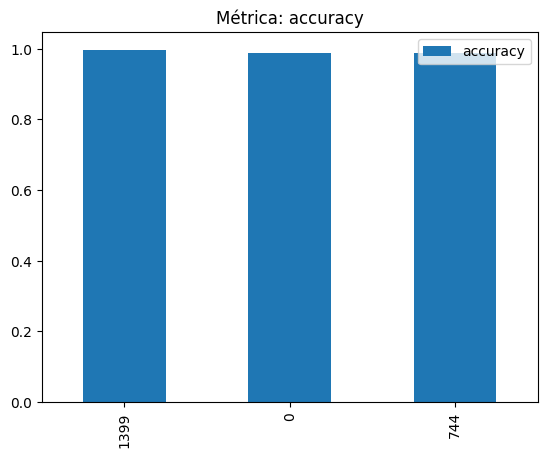

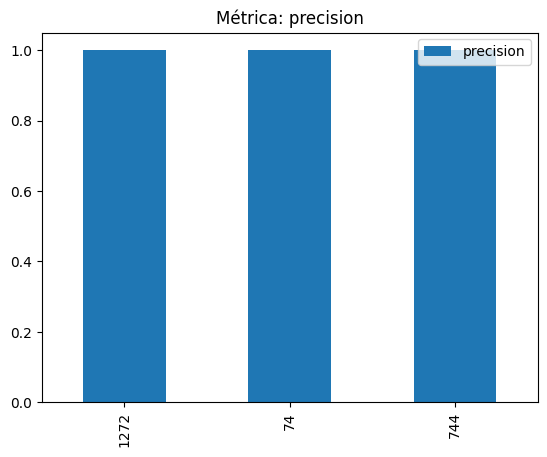

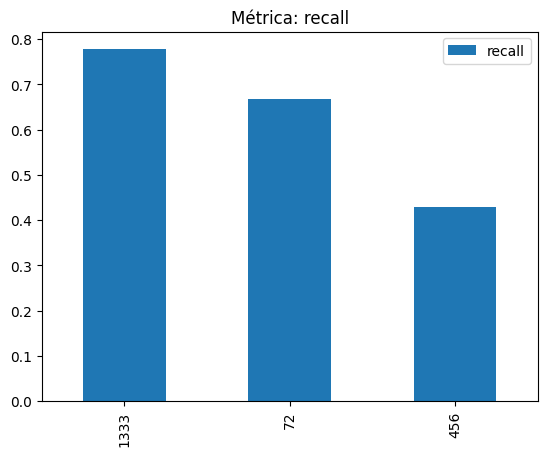

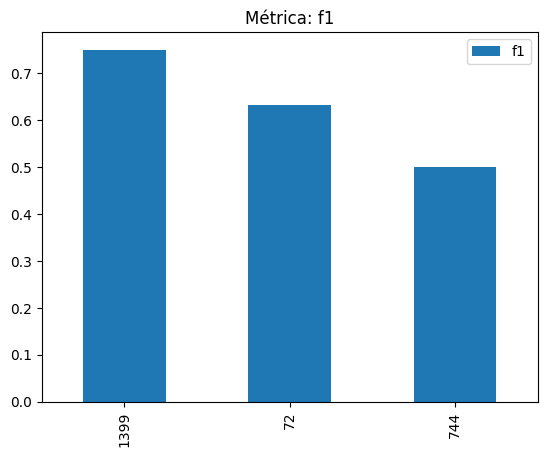

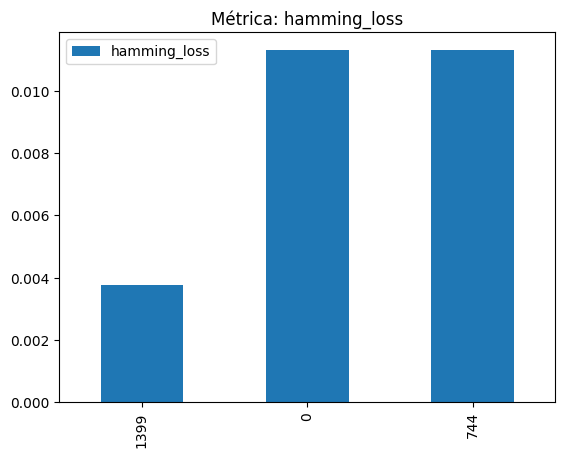

In [ ]:
for metrica in metricas:
    if metrica != 'hamming_loss':
        filtro = df[['usuario', 'modelo', metrica]].loc[df.groupby('modelo')[metrica].idxmax()].sort_values(by=metrica, ascending=False)
        print(f'Métrica: {metrica}\n{filtro}\n')
        lista_modelos.extend(filtro.index.tolist())
        df[['modelo', metrica]].loc[df.groupby('modelo')[metrica].idxmax()].sort_values(by=metrica, ascending=False).plot(y=metrica, kind='bar', title=f'Métrica: {metrica}')
    else:
        filtro = df[['usuario', 'modelo', metrica]].loc[df.groupby('modelo')[metrica].idxmin()].sort_values(by=metrica)
        print(f'Métrica: {metrica}\n{filtro}\n')
        lista_modelos.extend(filtro.index.tolist())
        df[['modelo', metrica]].loc[df.groupby('modelo')[metrica].idxmin()].sort_values(by=metrica).plot(y=metrica, kind='bar', title=f'Métrica: {metrica}')



##Top 5 valores de métricas por usuario y modelo de clasificación


Modelo: rf
Métrica: accuracy
     usuario modelo  accuracy
0       3133     rf  0.988679
104     1971     rf  0.988679
248     1971     rf  0.988679
249     1971     rf  0.988679
250     1971     rf  0.988679

Modelo: rf
Métrica: precision
     usuario modelo  precision
76      1971     rf        1.0
231     1971     rf        1.0
227     1971     rf        1.0
226     1971     rf        1.0
225     1971     rf        1.0

Modelo: rf
Métrica: recall
     usuario modelo    recall
127     1971     rf  0.666667
163     1971     rf  0.666667
96      1971     rf  0.666667
97      1971     rf  0.666667
85      1971     rf  0.666667

Modelo: rf
Métrica: f1
     usuario modelo        f1
96      1971     rf  0.631579
109     1971     rf  0.631579
108     1971     rf  0.631579
72      1971     rf  0.631579
73      1971     rf  0.631579

Modelo: rf
Métrica: hamming_loss
     usuario modelo  hamming_loss
0       3133     rf      0.011321
248     1971     rf      0.011321
249     1971     rf      0

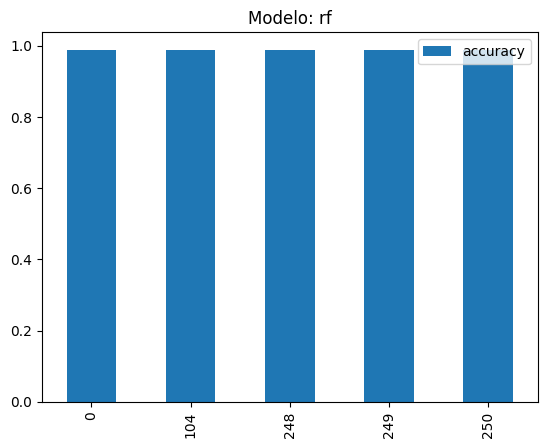

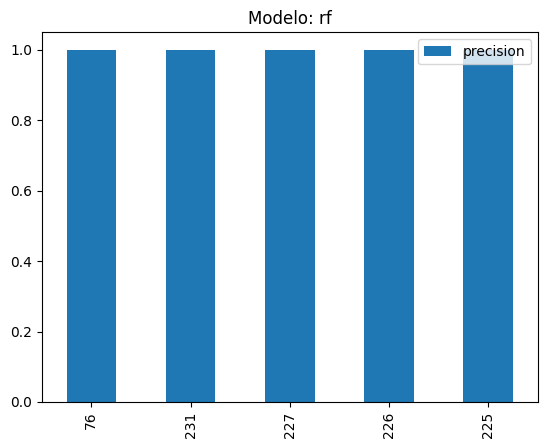

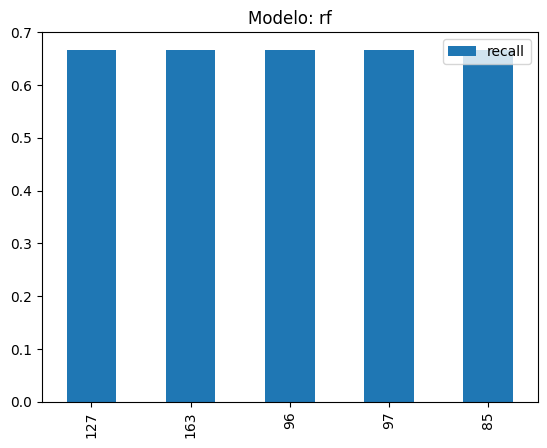

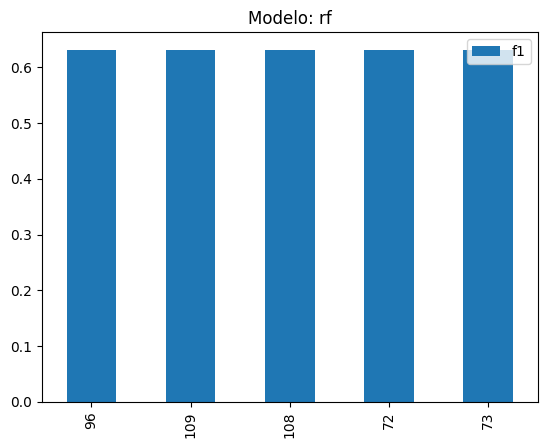

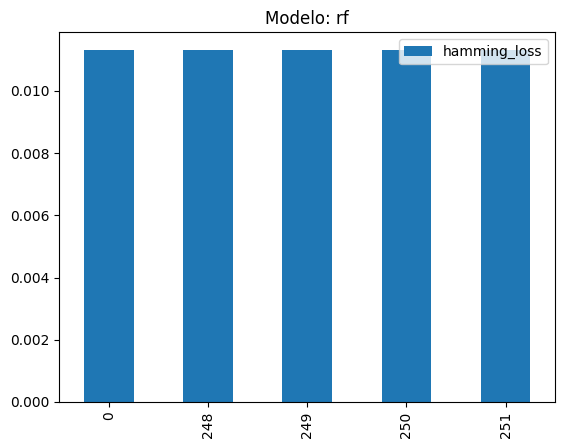

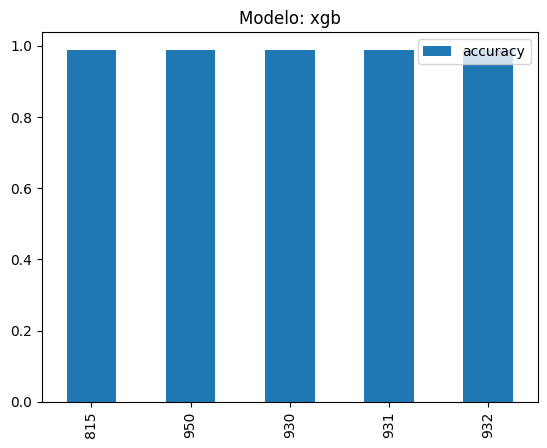

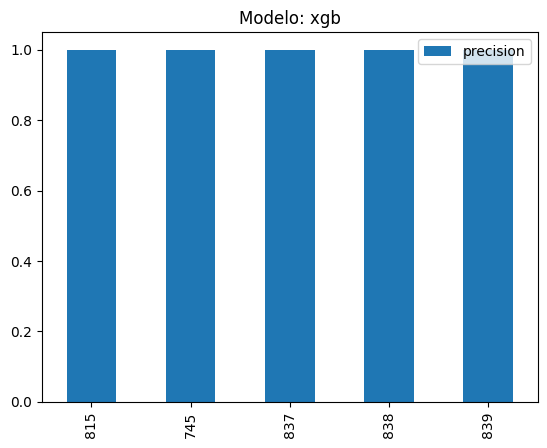

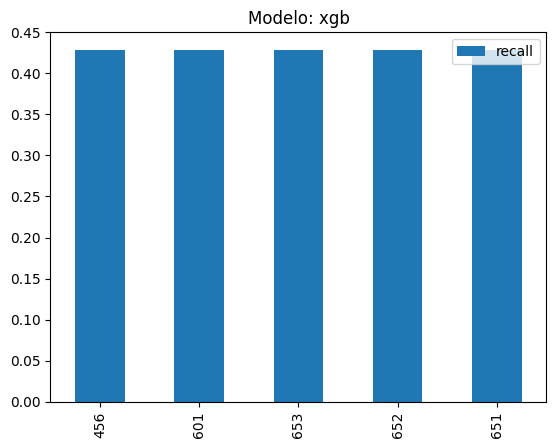

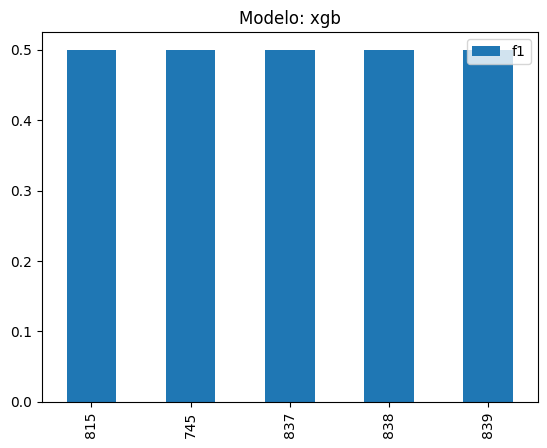

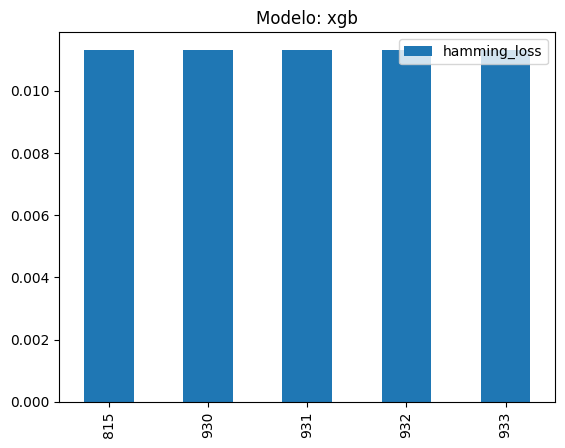

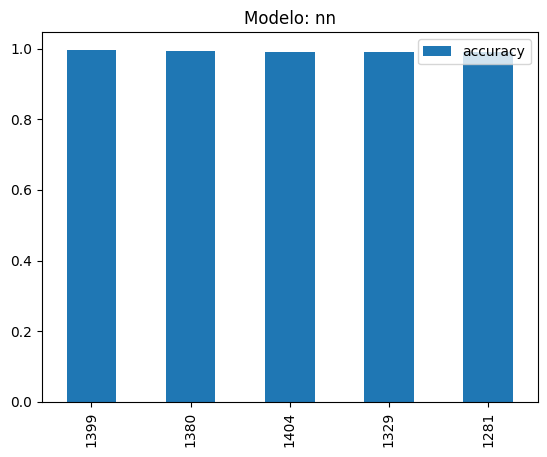

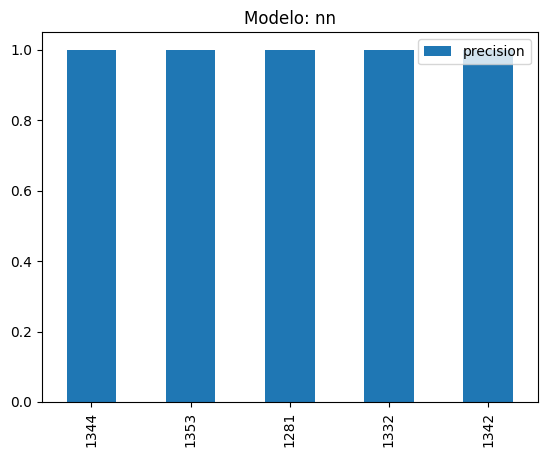

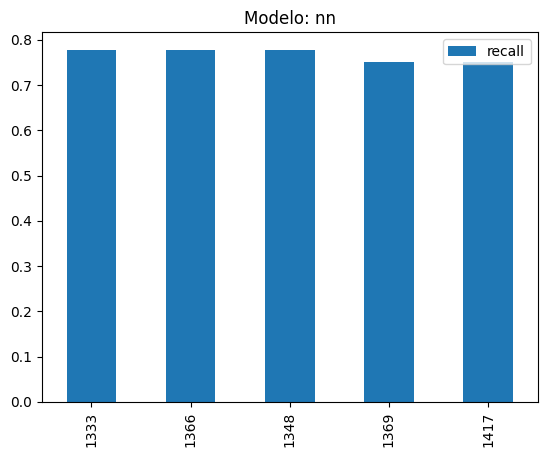

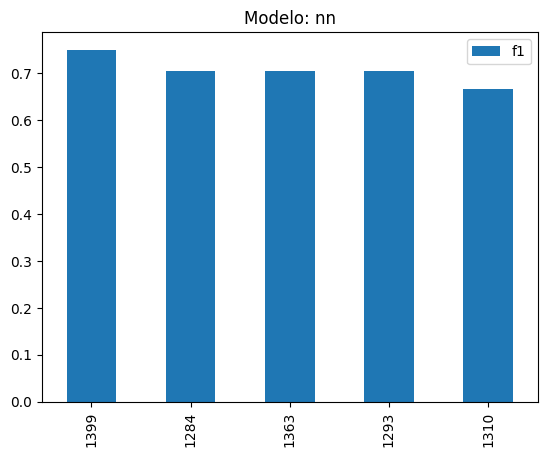

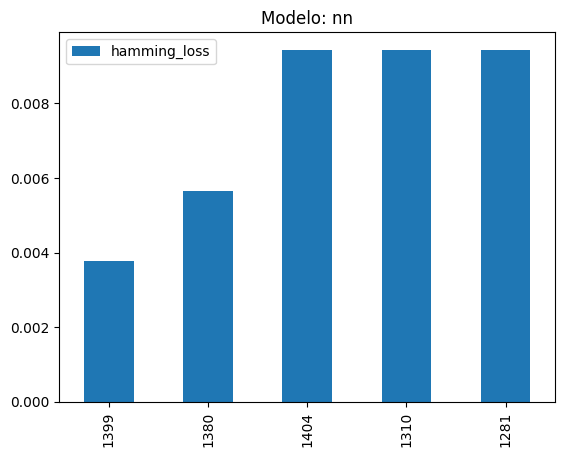

In [ ]:
for modelo in df['modelo'].unique():
    for metrica in metricas:
        if metrica != 'hamming_loss':
            filtro = df[['usuario', 'modelo', metrica]][(df['modelo']==modelo)].sort_values(by=metrica, ascending=False).head()
            print(f'Modelo: {modelo}\nMétrica: {metrica}\n{filtro}\n')
            lista_modelos.extend(filtro.index.tolist())
            df[['usuario', 'modelo', metrica]][(df['modelo']==modelo)].sort_values(by=metrica, ascending=False).head().plot(y=metrica, kind='bar', title=f'Modelo: {modelo}')
        else:
            filtro = df[['usuario', 'modelo', metrica]][(df['modelo']==modelo)].sort_values(by=metrica).head()
            print(f'Modelo: {modelo}\nMétrica: {metrica}\n{filtro}\n')
            lista_modelos.extend(filtro.index.tolist())
            df[['usuario', 'modelo', metrica]][(df['modelo']==modelo)].sort_values(by=metrica).head().plot(y=metrica, kind='bar', title=f'Modelo: {modelo}')

##Modelos con mejores valores de métricas por usuario

Usuario: 3133
Métrica: accuracy
     modelo  accuracy
1399     nn  0.996226
1281     nn  0.990566
0        rf  0.988679

Usuario: 3133
Métrica: precision
     modelo  precision
74       rf   1.000000
1399     nn   0.750000
0        rf   0.666667

Usuario: 3133
Métrica: recall
     modelo    recall
1333     nn  0.777778
1369     nn  0.750000
2        rf  0.428571

Usuario: 3133
Métrica: f1
     modelo        f1
1399     nn  0.750000
1284     nn  0.705882
1258     nn  0.500000

Usuario: 3133
Métrica: hamming_loss
     modelo  hamming_loss
1399     nn      0.003774
1281     nn      0.009434
0        rf      0.011321

Usuario: 1971
Métrica: accuracy
     modelo  accuracy
1399     nn  0.996226
1281     nn  0.990566
0        rf  0.988679

Usuario: 1971
Métrica: precision
     modelo  precision
74       rf   1.000000
1399     nn   0.750000
0        rf   0.666667

Usuario: 1971
Métrica: recall
     modelo    recall
1333     nn  0.777778
1369     nn  0.750000
2        rf  0.428571

Usuario: 197

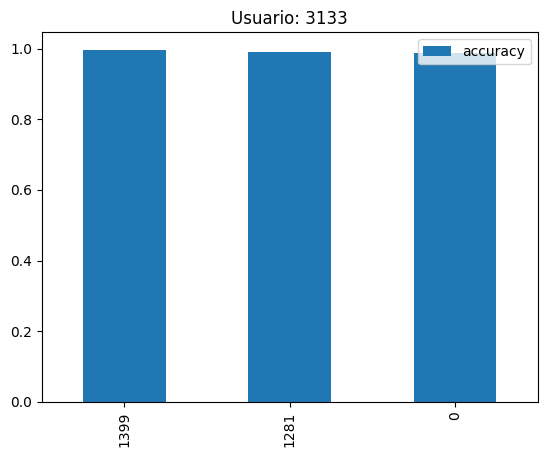

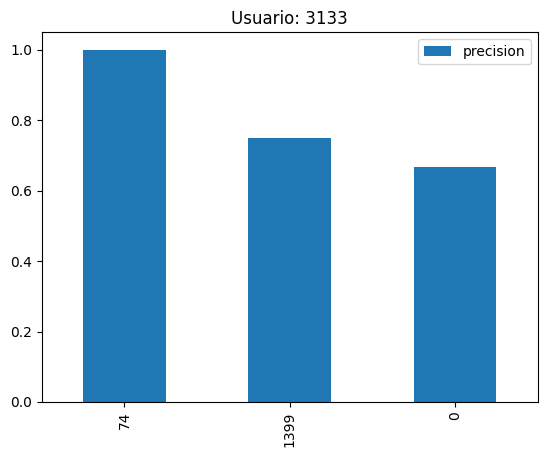

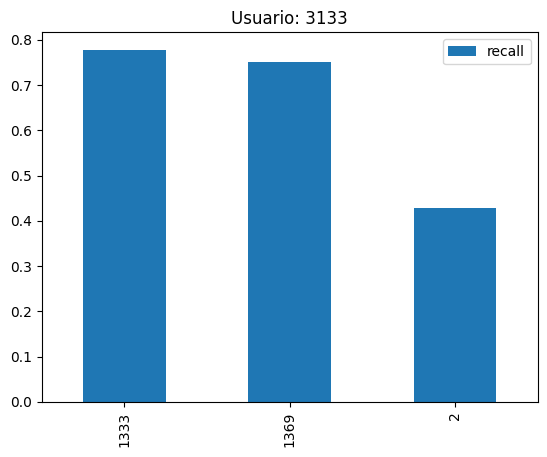

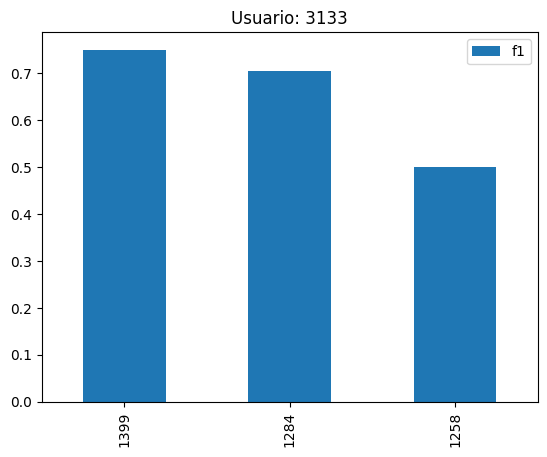

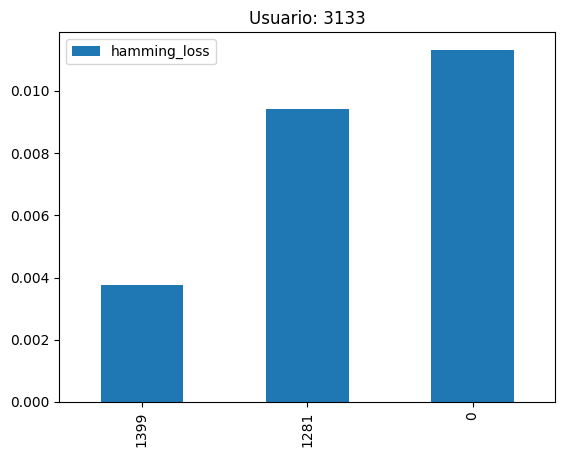

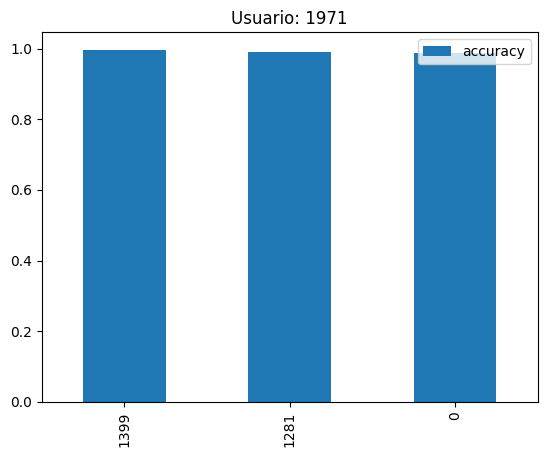

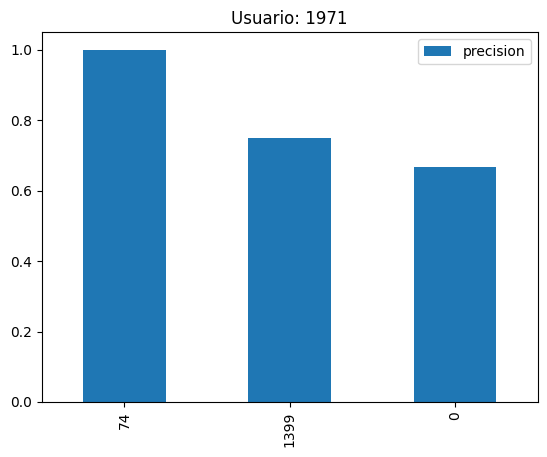

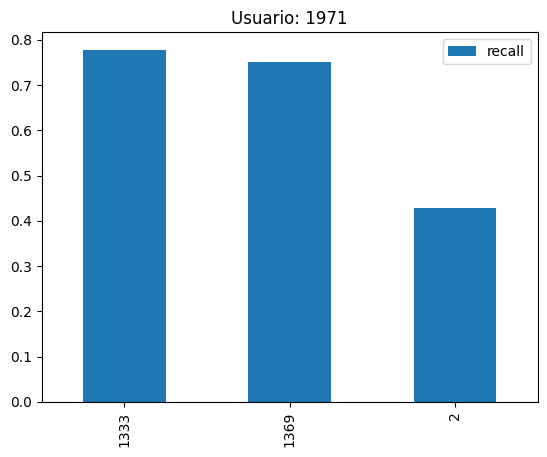

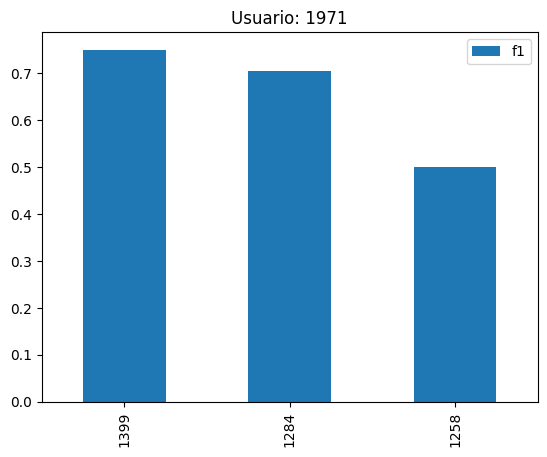

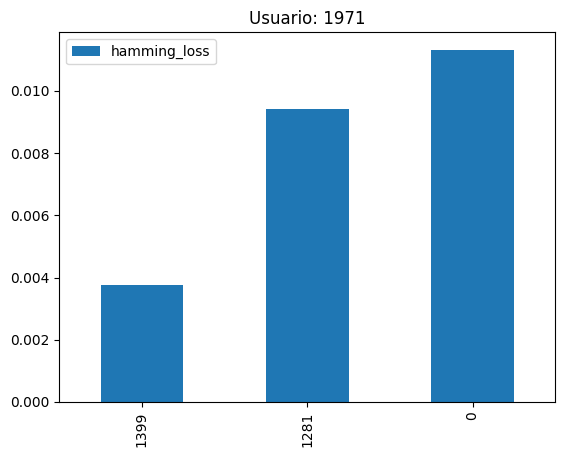

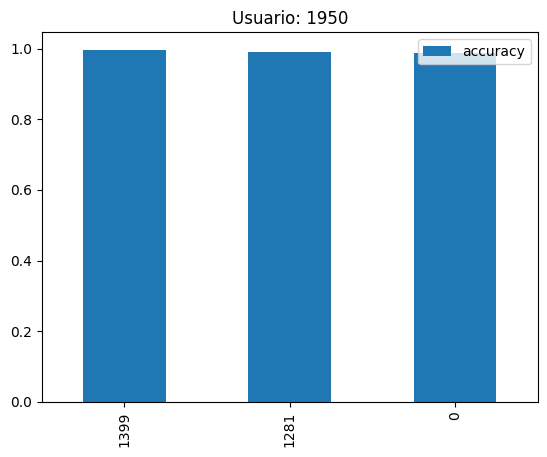

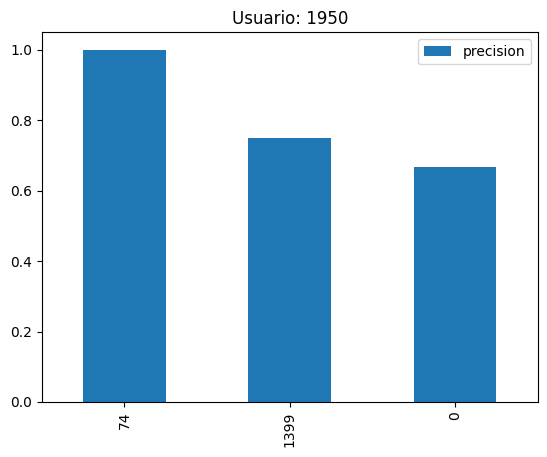

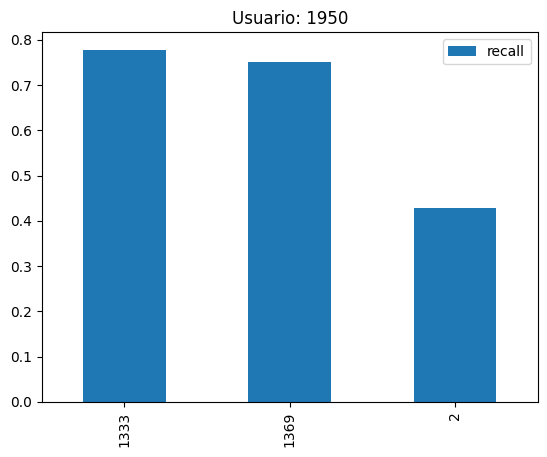

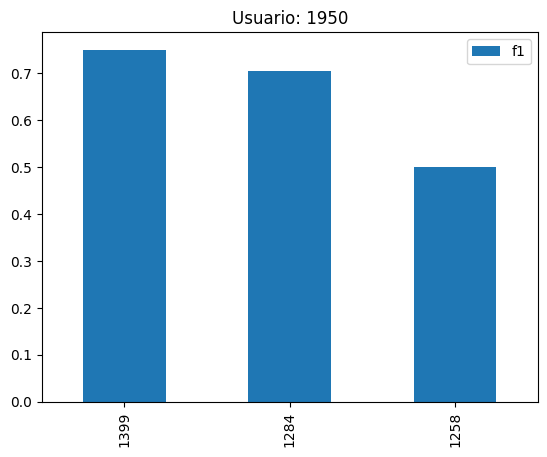

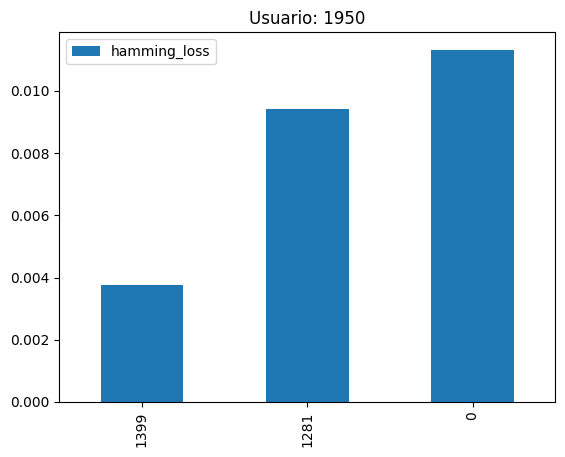

In [ ]:
for usuario in df['usuario'].unique():
    for metrica in metricas:
        if metrica != 'hamming_loss':
            filtro = df[['modelo', metrica]].loc[df.groupby('usuario')[metrica].idxmax()].sort_values(by=metrica, ascending=False)
            print(f'Usuario: {usuario}\nMétrica: {metrica}\n{filtro}\n')
            lista_modelos.extend(filtro.index.tolist())
            df[['modelo', metrica]].loc[df.groupby('usuario')[metrica].idxmax()].sort_values(by=metrica, ascending=False).plot(y=metrica, kind='bar', title=f'Usuario: {usuario}')
        else:
            filtro = df[['modelo', metrica]].loc[df.groupby('usuario')[metrica].idxmin()].sort_values(by=metrica)
            print(f'Usuario: {usuario}\nMétrica: {metrica}\n{filtro}\n')
            lista_modelos.extend(filtro.index.tolist())
            df[['modelo', metrica]].loc[df.groupby('usuario')[metrica].idxmin()].sort_values(by=metrica).plot(y=metrica, kind='bar', title=f'Usuario: {usuario}')

##Top 5 registros de métricas por modelo

Métrica: accuracy
      usuario modelo  accuracy
1399     1950     nn  0.996226
1380     1950     nn  0.994340
1293     1971     nn  0.990566
1342     1971     nn  0.990566
1363     1971     nn  0.990566

Métrica: precision
     usuario modelo  precision
778     1971    xgb        1.0
878     1971    xgb        1.0
880     1971    xgb        1.0
881     1971    xgb        1.0
882     1971    xgb        1.0

Métrica: recall
      usuario modelo    recall
1333     1971     nn  0.777778
1366     1971     nn  0.777778
1348     1971     nn  0.777778
1435     1950     nn  0.750000
1399     1950     nn  0.750000

Métrica: f1
      usuario modelo        f1
1399     1950     nn  0.750000
1293     1971     nn  0.705882
1284     1971     nn  0.705882
1363     1971     nn  0.705882
1329     1971     nn  0.666667

Métrica: hamming_loss
      usuario modelo  hamming_loss
1399     1950     nn      0.003774
1380     1950     nn      0.005660
1293     1971     nn      0.009434
1342     1971     nn     

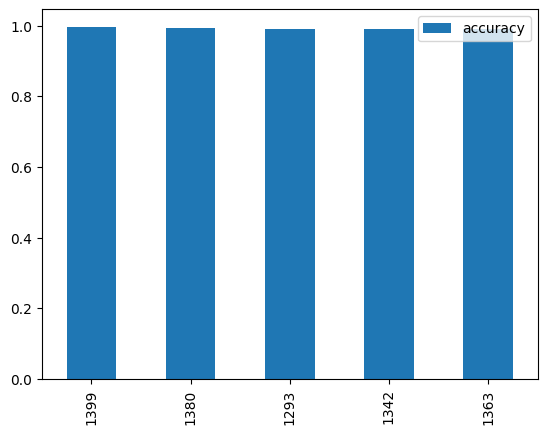

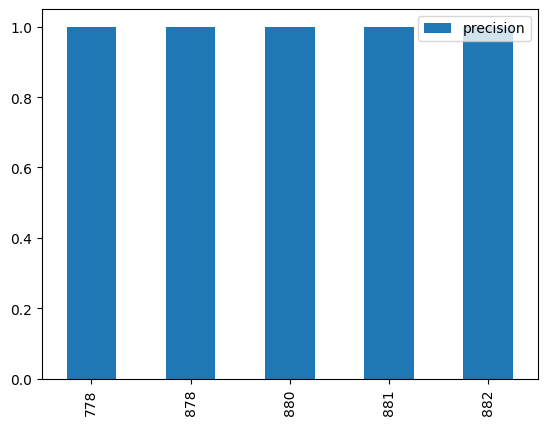

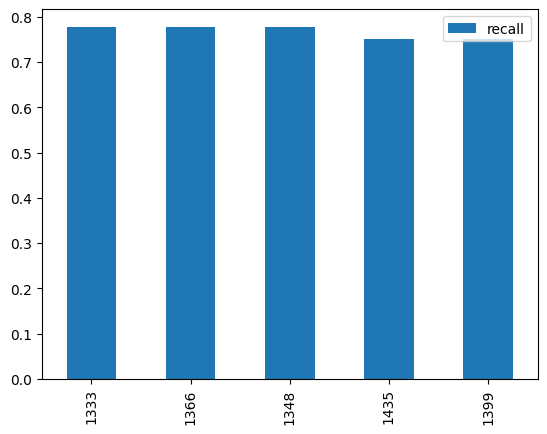

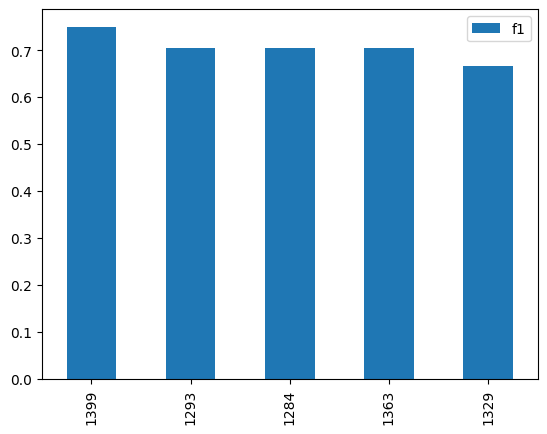

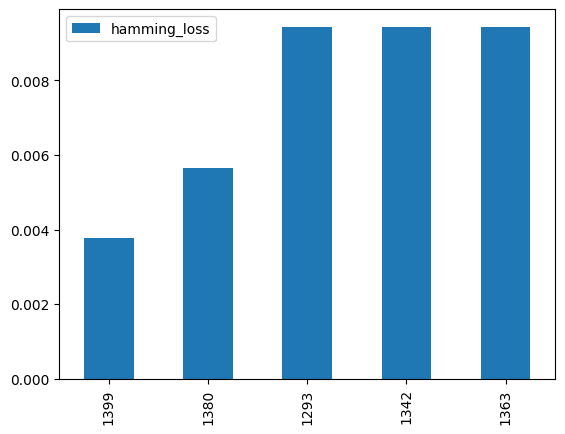

In [ ]:
for metrica in metricas:
    if metrica != 'hamming_loss':
        filtro = df[['usuario', 'modelo', metrica]].sort_values(by=metrica, ascending=False).head()
        print(f'Métrica: {metrica}\n{filtro}\n')
        lista_modelos.extend(filtro.index.tolist())
        df[['usuario', 'modelo', metrica]].sort_values(by=metrica, ascending=False).head().plot(y=metrica, kind='bar')
    else:
        filtro = df[['usuario', 'modelo', metrica]].sort_values(by=metrica).head()
        print(f'Métrica: {metrica}\n{filtro}\n')
        lista_modelos.extend(filtro.index.tolist())
        df[['usuario', 'modelo', metrica]].sort_values(by=metrica).head().plot(y=metrica, kind='bar')

In [ ]:
len(lista_modelos)

160

In [ ]:
df_modelos = pd.DataFrame(lista_modelos, columns=['modelo'])

In [ ]:
df_modelos['modelo'].unique()

array([1399,    0,  744, 1272,   74, 1333,   72,  456,  104,  248,  249,
        250,   76,  231,  227,  226,  225,  127,  163,   96,   97,   85,
        109,  108,   73,  251,  815,  950,  930,  931,  932,  745,  837,
        838,  839,  601,  653,  652,  651,  933, 1380, 1404, 1329, 1281,
       1344, 1353, 1332, 1342, 1366, 1348, 1369, 1417, 1284, 1363, 1293,
       1310,    2, 1258,  778,  878,  880,  881,  882, 1435])

In [ ]:
df_modelos['modelo'].nunique()

64

<Axes: ylabel='Frequency'>

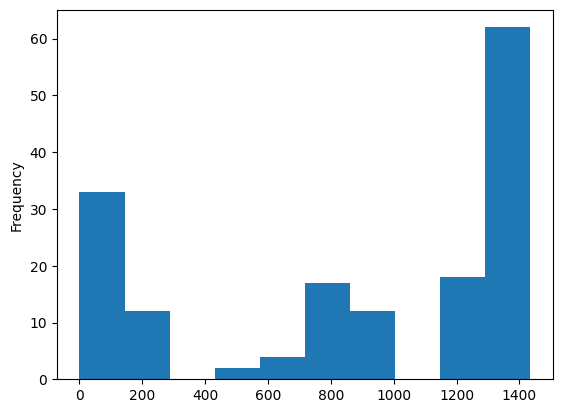

In [ ]:
df_modelos['modelo'].plot(kind='hist')

In [ ]:
df_modelos['modelo'].mode()

0    1399
Name: modelo, dtype: int64

In [ ]:
df.loc[1399]['hiperparametros']

"usuario=1950,  modelo: 3, activation1=relu, activation2=sigmoid, activation3=swish, learning_rate=0.1, regularizer=0.01, optimizer=<class 'keras.src.optimizers.nadam.Nadam'>, reduce_lr=0.4, batch_size=3, epochs=20, patience=2"